# Start Here

In [1]:
import os

from pydantic import BaseModel
from tqdm import tqdm

from core.modeling.extractors import functional as F
from core.modeling.extractors.feature_extractor import FeatureExtractor
from core.modeling.extractors.schema import Feature, Values
from core.schemas.ped import PEDSchema
from core.utils.loaders.local_loader import LocalFileLoader

## Configure Hyperparameters

## Download The Data

In [2]:
from core.utils.downloaders import GDownDownloader

downloader = GDownDownloader(root = cfg.data_root / "raw")
downloader.download(url='https://drive.google.com/u/0/uc?id=1l_hRL08BmSCLLdapLBdZRTt2QlsYpQFo', output='ped')
downloader.download(url='https://drive.google.com/u/0/uc?id=1vevHJHc4CMu_vP79IurflFjXeGfhfUwP', output='eels') 

NameError: name 'cfg' is not defined

In [ ]:
from glob import glob

import matplotlib.pyplot as plt
import numpy as np
import rasterio
from PIL import Image
from rasterio.plot import show
import scipy.special as sp
from PIL import Image

lst = []
for filename in glob('data/raw/eels/*.tif'):
    img = rasterio.open(filename).read()
    lst.append(img)
# img = np.median(np.array(lst), axis=0)
# show(img)

# img = np.linalg.norm(np.array(lst), axis=0)


img = np.quantile(np.array(lst), q=0.8, axis=0)
img = np.squeeze(img, axis=0)
img_path = Path(cfg.data_root /"processed"/"eels")
img_path.mkdir(parents=True, exist_ok=True)
plt.imsave(str(img_path/"cleaned.png"), img)

/root/miniconda3/envs/dreidel_venv/lib/python3.11/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


## Parse Data

In [ ]:
loader = LocalFileLoader(root=cfg.data_root/"raw"/"ped", schema=PEDSchema)
ped_data = [loader.parse_item(loader.root/item) for item in loader.items]

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 11: invalid start byte

In [ ]:
extractor = FeatureExtractor(cfg.data_root/"processed")
    
for extractor_name in cfg.extractors:
    extractor.extractor_name = extractor_name
    extractor.run(ped_data)

100%|██████████| 38148/38148 [00:00<00:00, 52244.27it/s]


In [ ]:
loader = LocalFileLoader(root=cfg.data_root/"processed", schema=Feature)
data = [loader.parse_item(loader.root/item) for item in loader.items]

In [ ]:
import os
import abc

import matplotlib.pyplot as plt
import numpy as np

class Visualiser:
    def __init__(self, root: Path, save: bool = True) -> None:
        self.root = root
        self.save = save
      
    def run(self, feature):
        grid = np.zeros(shape=(289, 132))
        
        for value in tqdm(feature.value):
            grid[value.x][value.y] = value.value
        path = self.root / "images"
        path.mkdir(parents=True, exist_ok=True)
        
        if self.save:
            plt.imsave(str(path/ f"{feature.extractor}.png"), grid)
        
        plt.show()

In [ ]:
vis = Visualiser(root=Path(cfg.data_root/"processed"))
for item in data:
    vis.run(item)

NameError: name 'Visualiser' is not defined

In [5]:
from dataclasses import dataclass
from pathlib import Path


@dataclass
class Config:
    root:Path = Path.cwd()
    data_root:Path = Path.cwd() / 'data'
    extractors:tuple = ('ext_min','ext_max','ext_avg')

cfg = Config()

In [41]:
from core.modeling.aligner import Aligner, StepAligner
import matplotlib.pyplot as plt

aligner = Aligner(save_path=cfg.data_root/"processed"/"aligned.png")

aligner.build(cfg)

img_path = cv2.imread(str(cfg.data_root/"processed"/"images"/"ext_max.png"))
tgt_path = cv2.imread(str(cfg.data_root/"processed"/"eels"/"cleaned.png"))
matched = aligner.run(str(img_path), str(tgt_path))

plt.imshow(matched)

NameError: name 'Any' is not defined

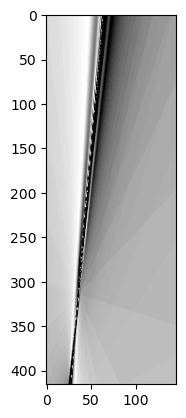

In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread(str(cfg.data_root/"processed"/"aligned.png"))
tgt = cv2.imread(str(cfg.data_root/"processed"/"eels"/"cleaned.png"))
# stacked = np.hstack((img, tgt))
plt.imshow(img)

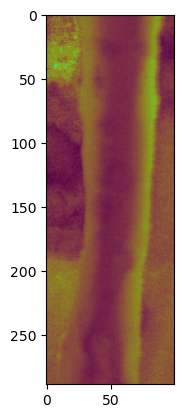

In [40]:
# select a points in a map (could be an detecting an object unsupervised)
import numpy as np
import cv2

img_path = cfg.data_root/"processed"/"images"/"ext_max.png"
img = cv2.imread(str(img_path))

def get_region(img:np.ndarray, 
               left_corner:tuple[int, int], 
               right_corner:tuple[int, int])->np.ndarray: 
    return img[:, 20:120]

region_of_interest = get_region(img, (0,10), (80, 80))
plt.imshow(region_of_interest)